**Grip- The sparks foundation<br>
Data science and business analytics intern**<br>
Author- Sheetal Nair A<br>
Task 1 -Prediction using Supervised ML<br>
In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**STEP 1 : Reading data from remote url**

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

**STEP 2 : Exploring the data**

In [3]:
data.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print(data.shape)
data.head(n=5)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
# now we will check if our dataset contains null or missings values  
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**STEP 3: Visualizing the dataset**

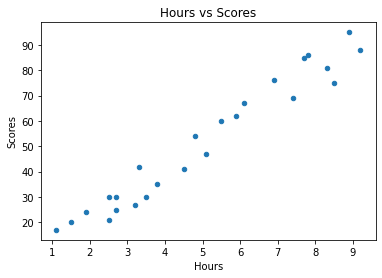

In [8]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.title('Hours vs Scores')
plt.show()

**From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage scoreS".Now we can use the linear regression supervised machine model on it to predict further values.**

In [9]:
# we can also use .corr to determine the corelation between the variables 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
hours=data['Hours']
scores=data['Scores']

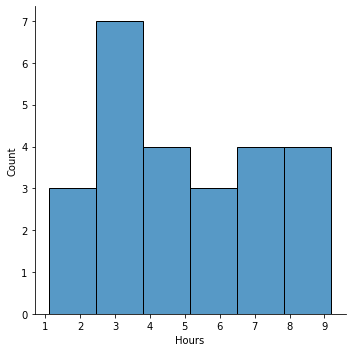

In [11]:
sns.displot(hours)

From the above graph its clear that there is a positive linear regression between hours and score


**STEP 4 : Data preparation**<br>
In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
# using iloc function we will divide the data 
X = data.iloc[:, :1].values  
y = data.iloc[:, 1:].values

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [16]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

**STEP 5 : Training the Algorithm**<br>
We have splited our data into training and testing sets, and now we will train our Model.

In [17]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

**STEP 6 : Visualizing the model**<br>
After training the model, now its time to visualize it.

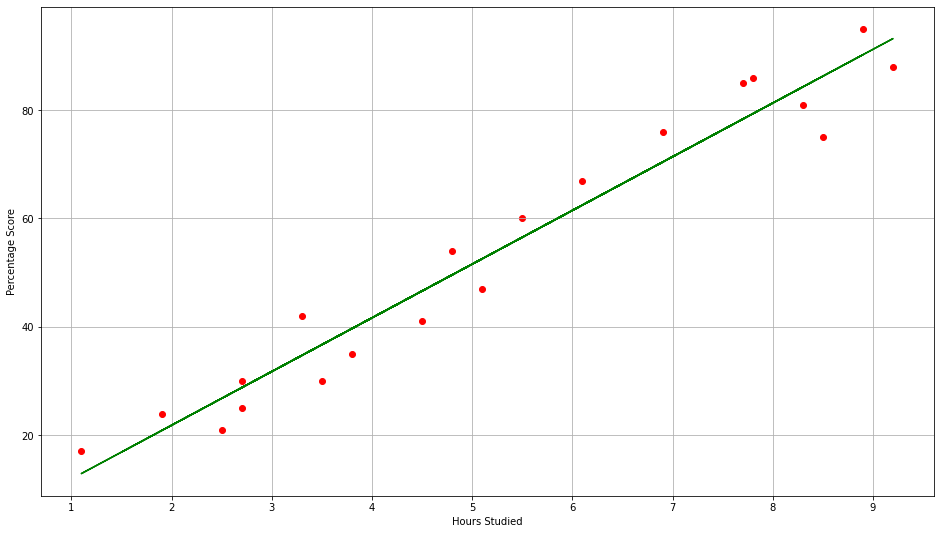

In [18]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

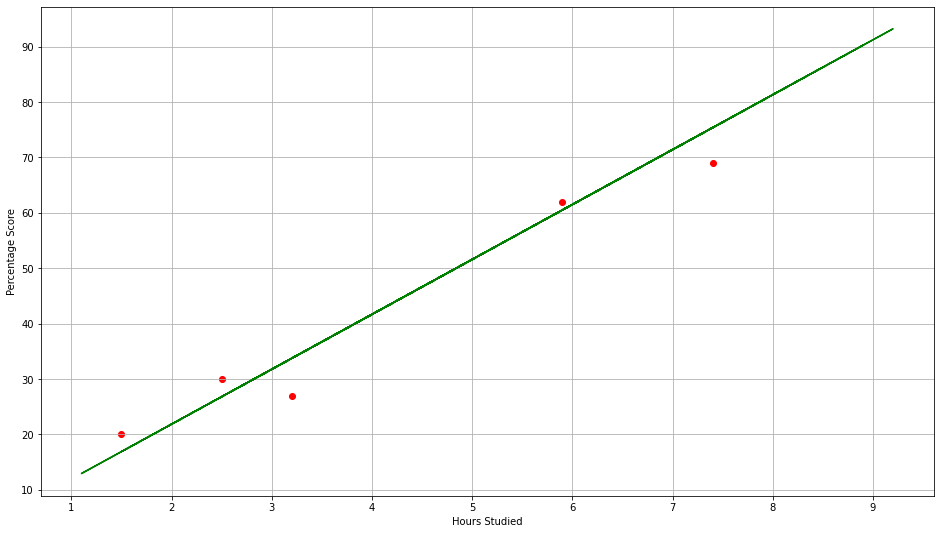

In [19]:
# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

**STEP 7 - Making Predictions**<br>
Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [22]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [23]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398027], [33.732260779489835], [..."


In [24]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


The predicted score if a person studies for 9.25 hours is [93.69173249]<br>
Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173248737538<br>

**STEP 8 - Evaluating the model**<br>
In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [25]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
